In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("https://raw.githubusercontent.com/wtitze/4E/main/comuni_italiani.json")
df

,_id,Denominazione in italiano,Provincia,Denominazione Regione,Ripartizione geografica
0,{'$oid': '619f9ec67727bc651542bb9f'},Agliè,Torino,Piemonte,Nord-ovest
1,{'$oid': '619f9ec67727bc651542bba0'},Airasca,Torino,Piemonte,Nord-ovest
2,{'$oid': '619f9ec67727bc651542bba1'},Ala di Stura,Torino,Piemonte,Nord-ovest
3,{'$oid': '619f9ec67727bc651542bba2'},Albiano d'Ivrea,Torino,Piemonte,Nord-ovest
4,{'$oid': '619f9ec67727bc651542bba3'},Almese,Torino,Piemonte,Nord-ovest
...,...,...,...,...,...
7902,{'$oid': '619f9ec67727bc651542da7d'},Villasor,Sud Sardegna,Sardegna,Isole
7903,{'$oid': '619f9ec67727bc651542da7e'},Villaspeciosa,Sud Sardegna,Sardegna,Isole
7904,{'$oid': '619fa3557727bc651542da80'},NaN,Torino,Piemonte,Nord-ovest
7905,{'$oid': '619fa3c57727bc651542da81'},NaN,Gorizia,Friuli-Venezia Giulia,Nord-est


In [ ]:
len(df)

7907

In [ ]:
df.count()

_id                          7907
Denominazione in italiano    7904
Provincia                    7907
Denominazione Regione        7907
Ripartizione geografica      7907
dtype: int64

In [ ]:
len(set(df['Provincia']))

107

In [ ]:
dfGroup = df.groupby(['Denominazione Regione', 'Provincia']).count()[["Ripartizione geografica"]]
dfGroup3 = dfGroup.groupby('Denominazione Regione').count().sort_values(by="Denominazione Regione", ascending=True)
dfGroup3

,Ripartizione geografica
Denominazione Regione,
Abruzzo,4
Basilicata,2
Calabria,5
Campania,5
Emilia-Romagna,9
Friuli-Venezia Giulia,4
Lazio,5
Liguria,4
Lombardia,12


In [ ]:
dfGroup = df.groupby('Provincia').count()[["Denominazione in italiano"]].sort_values(by = "Denominazione in italiano", ascending = False)
dfGroup

,Denominazione in italiano
Provincia,
Torino,312
Cuneo,247
Bergamo,243
Brescia,205
Alessandria,187
...,...
Massa-Carrara,17
Ragusa,12
Barletta-Andria-Trani,10


In [ ]:
dfGroup[dfGroup['Denominazione in italiano'] == dfGroup['Denominazione in italiano'].min()][['Denominazione in italiano']]

,Denominazione in italiano
Provincia,
Trieste,6


In [ ]:
dfGroup[dfGroup['Ripartizione geografica'] == dfGroup['Ripartizione geografica'].max()][['Ripartizione geografica']]

,,Ripartizione geografica
Denominazione Regione,Provincia,
Piemonte,Torino,313


In [ ]:
dfGroup.mean().round()

Ripartizione geografica    74.0
dtype: float64

<BarContainer object of 20 artists>

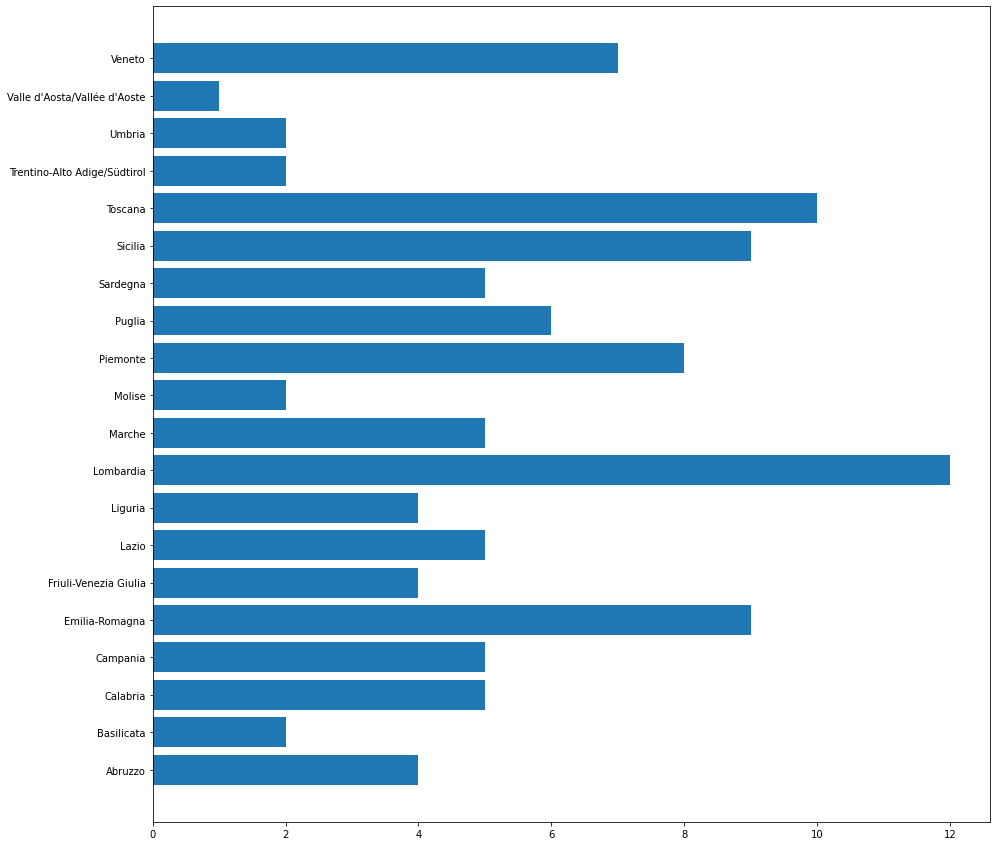

In [ ]:
import numpy as np

labels = dfGroup3.index
dati = dfGroup3['Ripartizione geografica']
fig, ax = plt.subplots(figsize=(15,15))
ax.barh(labels, dati)

In [ ]:
!pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


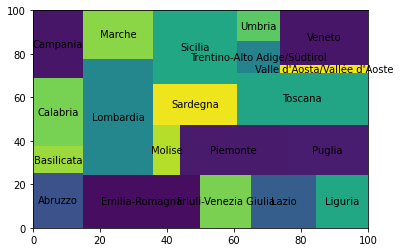

In [ ]:
import squarify
labels = dfGroup3.index
dati = dfGroup3['Ripartizione geografica']

squarify.plot(sizes=dati, label = labels)